In [ ]:
# Import Statements
import os
import csv      
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import glob

In [ ]:
!git clone https://github.com/raghudv94/Data_Mining_dataset.git

Cloning into 'Data_Mining_dataset'...
remote: Enumerating objects: 255, done.
remote: Counting objects: 100% (255/255), done.
remote: Compressing objects: 100% (255/255), done.
remote: Total 255 (delta 5), reused 235 (delta 0), pack-reused 0
Receiving objects: 100% (255/255), 121.13 MiB | 20.46 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (242/242), done.


In [ ]:
file_path_products = 'Data_Mining_dataset/products_info.csv'
products_info= pd.read_csv(file_path_products, sep=',')

file_path_districts = 'Data_Mining_dataset/districts_info.csv'
districts_info= pd.read_csv(file_path_districts, sep=',')


In [ ]:
file_path_demographics = 'Data_Mining_dataset/broadband_access.csv'
state_info = pd.read_csv(file_path_demographics,sep=',')

In [ ]:
# Downloading and merging engagement data
file_path_engagement_data ='Data_Mining_dataset/engagement_data'
# The below line should be executed only once 
os.chdir("Data_Mining_dataset/engagement_data")



In [ ]:
covid_data = pd.read_csv("/content/Data_Mining_dataset/COVID19_state.csv")
covid_data = covid_data.rename(columns={"State":"state"})
req_new = covid_data[['state','Infected','Deaths','GDP','Smoking Rate','Age 0-25','Pop Density','Income']]

In [ ]:
state_info = state_info[['state','unemp','health_ins','poverty','SNAP','no_comp','no_internet','home_broad','broad_num','broad_avail']]
state_info = state_info.groupby('state').mean().reset_index()
districts_info = districts_info.dropna()
products_info.dropna()
# splitting products last column into engagement and engagement_category 
products_info[['primary_function' , 'secondary_category_function']] = products_info['Primary Essential Function'].str.split('-', expand=True, n=1)
del products_info['Primary Essential Function']
# df[['First','Last']] = df.Name.str.split(expand=True)
products_info.dropna()


,LP ID,URL,Product Name,Provider/Company Name,Sector(s),primary_function,secondary_category_function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC,Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC,Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,LC,"Sites, Resources & Reference - Games & Simula..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC,Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC,Digital Learning Platforms
...,...,...,...,...,...,...,...
365,22241,https://www.history.com/,History.com,"A&E Television Networks, LLC",PreK-12; Higher Ed,LC,"Sites, Resources & Reference"
366,93376,https://www.cultofpedagogy.com/,Cult of Pedagogy,Cult of Pedagogy,PreK-12,CM,Teacher Resources - Professional Learning
367,88065,https://dochub.com/,DocHub,DocHub,PreK-12; Higher Ed; Corporate,SDO,Other
368,37805,http://google.com/slides/about/,Google Slides,Google LLC,PreK-12; Higher Ed; Corporate,LC,Content Creation & Curation


In [ ]:
merged_engagement_data = pd.DataFrame()
file_path='Data_Mining_dataset/engagement_data/'
for district in districts_info.district_id.iteritems():
  temp_file_path = str(district[1])+'.csv'
  temp = pd.read_csv(temp_file_path,sep=',')
  #temp.fillna(temp.mean())
  temp['district_id']=int(district[1])
  #temp.fillna(temp.mean())
  merged_engagement_data = merged_engagement_data.append(temp,ignore_index=True)

merged_engagement_data['time'] = pd.to_datetime(merged_engagement_data['time'])
merged_engagement_data['month'] = pd.DatetimeIndex(merged_engagement_data['time']).month
merged_engagement_data['week']= pd.DatetimeIndex(merged_engagement_data['time']).week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  del sys.path[0]


**Exploratory Data Analysis**

Analysis focusing on the products and the providers for these products

In [ ]:

merged_engagement_and_product_data=merged_engagement_data.copy()
merged_engagement_and_product_data=merged_engagement_and_product_data.merge(products_info,left_on='lp_id',right_on='LP ID',how='left')
merged_engagement_and_product_data = merged_engagement_and_product_data.drop('LP ID', axis=1)



In [ ]:
merged_engagement_and_district_data = pd.merge(merged_engagement_data,districts_info, on="district_id")


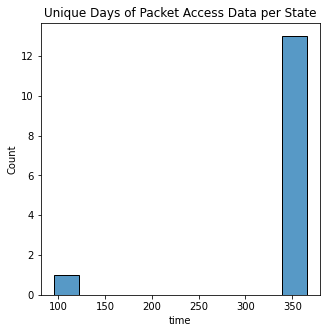

In [ ]:
merged_engagement_and_district_data.isna().sum()
merged_engagement_and_district_data_copy = merged_engagement_and_district_data.copy()

fig, ax = plt.subplots(figsize=(5,5))
sns.histplot(merged_engagement_and_district_data.groupby('state').time.nunique(), bins=10 ,palette='YlOrBr')
ax.set_title('Unique Days of Packet Access Data per State')
plt.show()

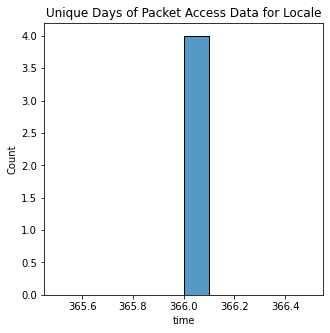

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.histplot(merged_engagement_and_district_data.groupby('locale').time.nunique(), bins=10 ,palette='YlOrBr')
ax.set_title('Unique Days of Packet Access Data for Locale')
plt.show()

In [ ]:
merged_engagement_and_district_data_copy.dropna()

,time,lp_id,pct_access,engagement_index,district_id,month,week,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,2020-01-27,32213.0,100.00,3000.00,8815,1,5,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2020-02-25,90153.0,33.33,2666.67,8815,2,9,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
4,2020-02-25,95731.0,33.33,333.33,8815,2,9,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
5,2020-02-26,95731.0,25.00,1750.00,8815,2,9,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
6,2020-02-26,32213.0,25.00,1750.00,8815,2,9,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9371940,2020-12-31,83862.0,0.01,0.09,4929,12,53,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
9371942,2020-12-31,13823.0,0.01,0.26,4929,12,53,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
9371943,2020-12-31,57084.0,0.01,0.26,4929,12,53,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
9371944,2020-12-31,83704.0,0.01,0.09,4929,12,53,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["


In [ ]:
state = merged_engagement_and_district_data_copy.groupby('state').time.nunique()
state = state[state>=365]
state=list(state.index)
merged_data_copy = merged_engagement_and_district_data_copy[merged_engagement_and_district_data_copy.state.isin(state)]
merged_data_copy.shape

(9342254, 13)

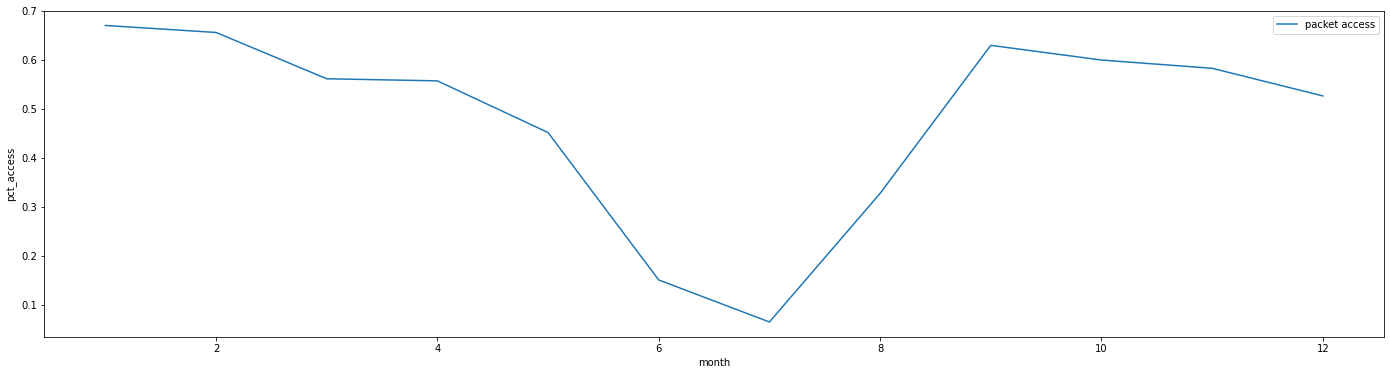

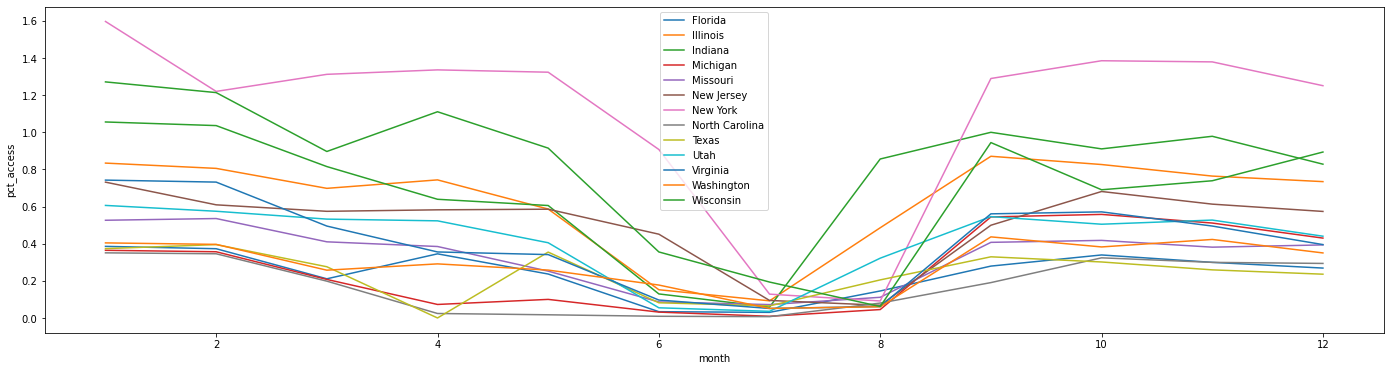

In [ ]:
# Remove weekends from the dataframe
merged_engagement_and_district_data_copy['weekday'] = pd.DatetimeIndex(merged_engagement_and_district_data_copy['time']).weekday
merged_data_copy_without_weekends = merged_engagement_and_district_data_copy[merged_engagement_and_district_data_copy.weekday < 5]

# packet access
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
temp = merged_data_copy_without_weekends.groupby('month').pct_access.mean().to_frame().reset_index(drop=False)
sns.lineplot(x=temp.month, y=temp.pct_access, label='packet access')
plt.legend()
plt.show()

#packet access with state 
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
for st in state:
    temp = merged_data_copy_without_weekends[merged_data_copy_without_weekends.state == st].groupby('month').pct_access.mean().to_frame().reset_index(drop=False)
    sns.lineplot(x=temp.month, y=temp.pct_access, label=st)
plt.legend()
plt.show()

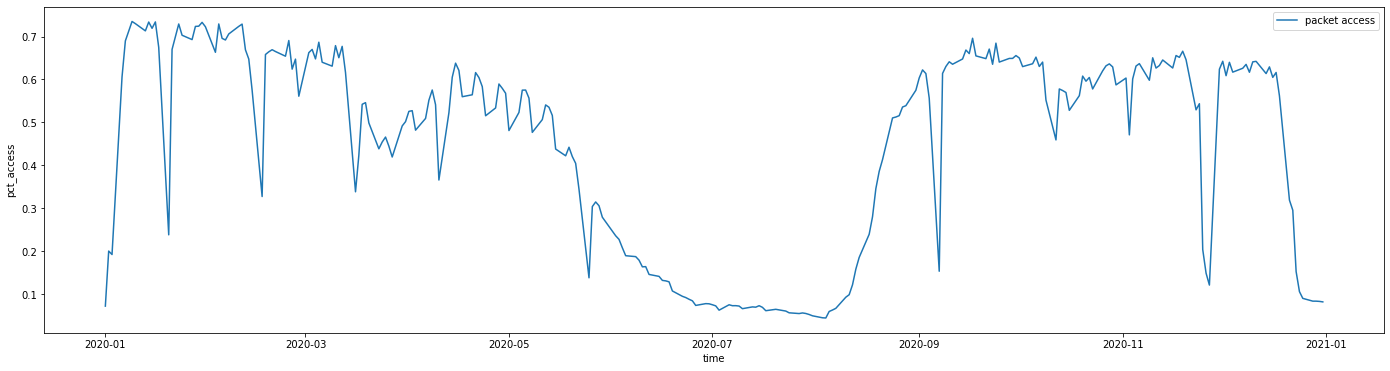

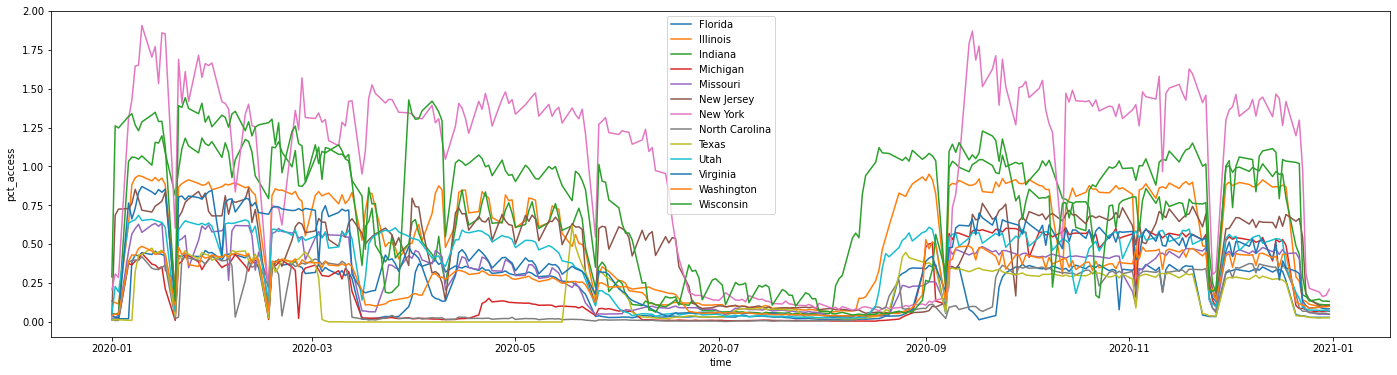

In [ ]:
# Remove weekends from the dataframe
merged_engagement_and_district_data_copy['weekday'] = pd.DatetimeIndex(merged_engagement_and_district_data_copy['time']).weekday
merged_data_copy_without_weekends = merged_engagement_and_district_data_copy[merged_engagement_and_district_data_copy.weekday < 5]

# packet access
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
temp = merged_data_copy_without_weekends.groupby('time').pct_access.mean().to_frame().reset_index(drop=False)
sns.lineplot(x=temp.time, y=temp.pct_access, label='packet access')
plt.legend()
plt.show()

#packet access with state 
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 6))
for st in state:
    temp = merged_data_copy_without_weekends[merged_data_copy_without_weekends.state == st].groupby('time').pct_access.mean().to_frame().reset_index(drop=False)
    sns.lineplot(x=temp.time, y=temp.pct_access, label=st)
plt.legend()
plt.show()

In [ ]:
import datetime
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [ ]:
all_data = merged_data_copy_without_weekends.copy()
print(all_data.head(5))
all_data = all_data.merge(products_info,left_on='lp_id',right_on='LP ID',how='left')
all_data.shape


        time    lp_id  ...    pp_total_raw  weekday
0 2020-01-27  32213.0  ...  [14000, 16000[        0
1 2020-02-25  90153.0  ...  [14000, 16000[        1
2 2020-02-25  99916.0  ...  [14000, 16000[        1
3 2020-02-25  28504.0  ...  [14000, 16000[        1
4 2020-02-25  95731.0  ...  [14000, 16000[        1

[5 rows x 14 columns]


(7655599, 21)

In [ ]:
covid_data = pd.read_csv("/content/Data_Mining_dataset/COVID19_state.csv")
covid_data = covid_data.rename(columns={"State":"state"})
req_new = covid_data[['state','Infected','Deaths','GDP','Smoking Rate','Age 0-25','Pop Density','Income']]

In [ ]:
all_data.head(3)
state_info.head(3)
all_data=all_data.merge(state_info,left_on='state',right_on='state',how='left')
all_data = pd.merge(all_data, req_new, on='state')

In [ ]:
all_data

,time,lp_id,pct_access,engagement_index,district_id,month,week,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,weekday,LP ID,URL,Product Name,Provider/Company Name,Sector(s),primary_function,secondary_category_function,unemp,health_ins,poverty,SNAP,no_comp,no_internet,home_broad,broad_num,broad_avail,Infected,Deaths,GDP,Smoking Rate,Age 0-25,Pop Density,Income
0,2020-01-27,32213.0,100.00,3000.00,8815,1,5,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",0,32213.0,https://classroom.google.com,Google Classroom,Google LLC,PreK-12; Higher Ed; Corporate,SDO,Learning Management Systems (LMS),4.424510,5.578431,13.589216,13.494118,16.277451,24.061765,75.252941,4.166667,70.545098,429761,10093,67268,15.5,0.33,228.0243,56933
1,2020-02-25,90153.0,33.33,2666.67,8815,2,9,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",1,90153.0,https://www.netflix.com/,Netflix,Netflix,PreK-12; Higher Ed; Corporate,LC,"Sites, Resources & Reference - Streaming Serv...",4.424510,5.578431,13.589216,13.494118,16.277451,24.061765,75.252941,4.166667,70.545098,429761,10093,67268,15.5,0.33,228.0243,56933
2,2020-02-25,99916.0,0.00,NaN,8815,2,9,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",1,99916.0,https://drive.google.com/start,Google Drive,Google LLC,PreK-12; Higher Ed; Corporate,LC/CM/SDO,Other,4.424510,5.578431,13.589216,13.494118,16.277451,24.061765,75.252941,4.166667,70.545098,429761,10093,67268,15.5,0.33,228.0243,56933
3,2020-02-25,28504.0,0.00,NaN,8815,2,9,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",1,28504.0,http://google.com/sheets/about/,Google Sheets,Google LLC,PreK-12; Higher Ed; Corporate,LC/CM/SDO,Other,4.424510,5.578431,13.589216,13.494118,16.277451,24.061765,75.252941,4.166667,70.545098,429761,10093,67268,15.5,0.33,228.0243,56933
4,2020-02-25,95731.0,33.33,333.33,8815,2,9,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",1,95731.0,http://docs.google.com/,Google Docs,Google LLC,PreK-12; Higher Ed; Corporate,LC,Content Creation & Curation,4.424510,5.578431,13.589216,13.494118,16.277451,24.061765,75.252941,4.166667,70.545098,429761,10093,67268,15.5,0.33,228.0243,56933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7655594,2020-12-31,60825.0,0.01,0.77,3732,12,53,Michigan,Suburb,"[0.4, 0.6[","[0.4, 0.6[","[0.18, 1[","[12000, 14000[",3,60825.0,http://study.com,Study.com,Study.com,PreK-12; Higher Ed,LC,Digital Learning Platforms,4.961446,6.891566,14.986747,13.533735,15.004819,24.750602,74.371084,4.168675,70.418072,204326,7716,53209,19.3,0.32,177.6655,47582
7655595,2020-12-31,50479.0,0.21,34.48,3732,12,53,Michigan,Suburb,"[0.4, 0.6[","[0.4, 0.6[","[0.18, 1[","[12000, 14000[",3,50479.0,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,LC,"Sites, Resources & Reference - Games & Simula...",4.961446,6.891566,14.986747,13.533735,15.004819,24.750602,74.371084,4.168675,70.418072,204326,7716,53209,19.3,0.32,177.6655,47582
7655596,2020-12-31,99580.0,0.00,NaN,3732,12,53,Michigan,Suburb,"[0.4, 0.6[","[0.4, 0.6[","[0.18, 1[","[12000, 14000[",3,99580.0,https://loom.com/,"Loom - Video Recorder: Screen, Webcam and Mic","Loom, Inc",PreK-12; Higher Ed; Corporate,CM,Virtual Classroom - Video Conferencing & Scre...,4.961446,6.891566,14.986747,13.533735,15.004819,24.750602,74.371084,4.168675,70.418072,204326,7716,53209,19.3,0.32,177.6655,47582
7655597,2020-12-31,11313.0,0.00,NaN,3732,12,53,Michigan,Suburb,"[0.4, 0.6[","[0.4, 0.6[","[0.18, 1[","[12000, 14000[",3,11313.0,http://toytheater.com,Toy Theater,Toy Theater,PreK-12,LC,"Sites, Resources & Reference - Games & Simula...",4.961446,6.891566,14.986747,13.533735,15.004819,24.750602,74.371084,4.168675,70.418072,204326,7716,53209,19.3,0.32,177.6655,47582


In [ ]:
test= all_data.groupby('state').count()


In [ ]:
test.shape

(14, 36)

In [ ]:
del all_data ['lp_id']

In [ ]:
del all_data['LP ID']
del all_data['URL']
#del all_data['state']

In [ ]:
def replace_ranges_pct(range_str):
    if range_str == '[0, 0.2[':
        return 0.1
    elif range_str == '[0.2, 0.4[':
        return 0.3
    elif range_str == '[0.4, 0.6[':
        return 0.5
    elif range_str == '[0.6, 0.8[':
        return 0.7
    elif range_str == '[0.8, 1[':
        return 0.9
    else:
        return np.nan

In [ ]:
all_data['pct_black/hispanic'] = all_data['pct_black/hispanic'].apply(lambda x: replace_ranges_pct(x))

In [ ]:
all_data['pct_free/reduced']= all_data['pct_free/reduced'].apply(lambda x:replace_ranges_pct(x))

In [ ]:
del all_data['county_connections_ratio']

In [ ]:
all_data.pp_total_raw.unique()

array(['[14000, 16000[', '[12000, 14000[', '[10000, 12000[',
       '[16000, 18000[', '[18000, 20000[', '[6000, 8000[',
       '[8000, 10000[', '[4000, 6000[', '[22000, 24000[',
       '[32000, 34000['], dtype=object)

In [ ]:
def replace_ranges(range_str):
    if range_str == '[14000, 16000[':
        return 15000
    elif range_str == '[6000, 8000[':
        return 7000
    elif range_str == '[10000, 12000[':
        return 11000
    elif range_str == '[8000, 10000[':
        return 9000
    elif range_str == '[12000, 14000[':
        return 13000
    elif range_str == '[18000, 20000[':
        return 19000
    elif range_str == '[22000, 24000[':
        return 23000
    elif range_str == '[16000, 18000[':
        return 17000
    elif range_str == '[4000, 6000[':
        return 5000
    elif range_str == '[32000, 34000[':
        return 35000
    else:
        return np.nan

In [ ]:
all_data['pp_total_raw']= all_data['pp_total_raw'].apply(lambda x:replace_ranges(x))

In [ ]:
all_data.isna().sum()

time                                 0
pct_access                        2751
engagement_index               1813582
district_id                          0
month                                0
week                                 0
state                                0
locale                               0
pct_black/hispanic                   0
pct_free/reduced                     0
pp_total_raw                         0
weekday                              0
Product Name                   3977461
Provider/Company Name          3977461
Sector(s)                      4140324
primary_function               4140324
secondary_category_function    4140324
unemp                                0
health_ins                           0
poverty                              0
SNAP                                 0
no_comp                              0
no_internet                          0
home_broad                           0
broad_num                            0
broad_avail              

In [ ]:
all_data['engagement_index'] = all_data['engagement_index'].replace(np.nan, all_data.engagement_index.mean())

In [ ]:
all_data['pct_access'] = all_data['pct_access'].replace(np.nan, all_data.pct_access.mean())

In [ ]:
one_hot = pd.get_dummies(all_data['locale'])
# Drop column B as it is now encoded
all_data = all_data.drop('locale',axis = 1)
# Join the encoded df
all_data = all_data.join(one_hot)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff866851bd0>,
      dtype=object)

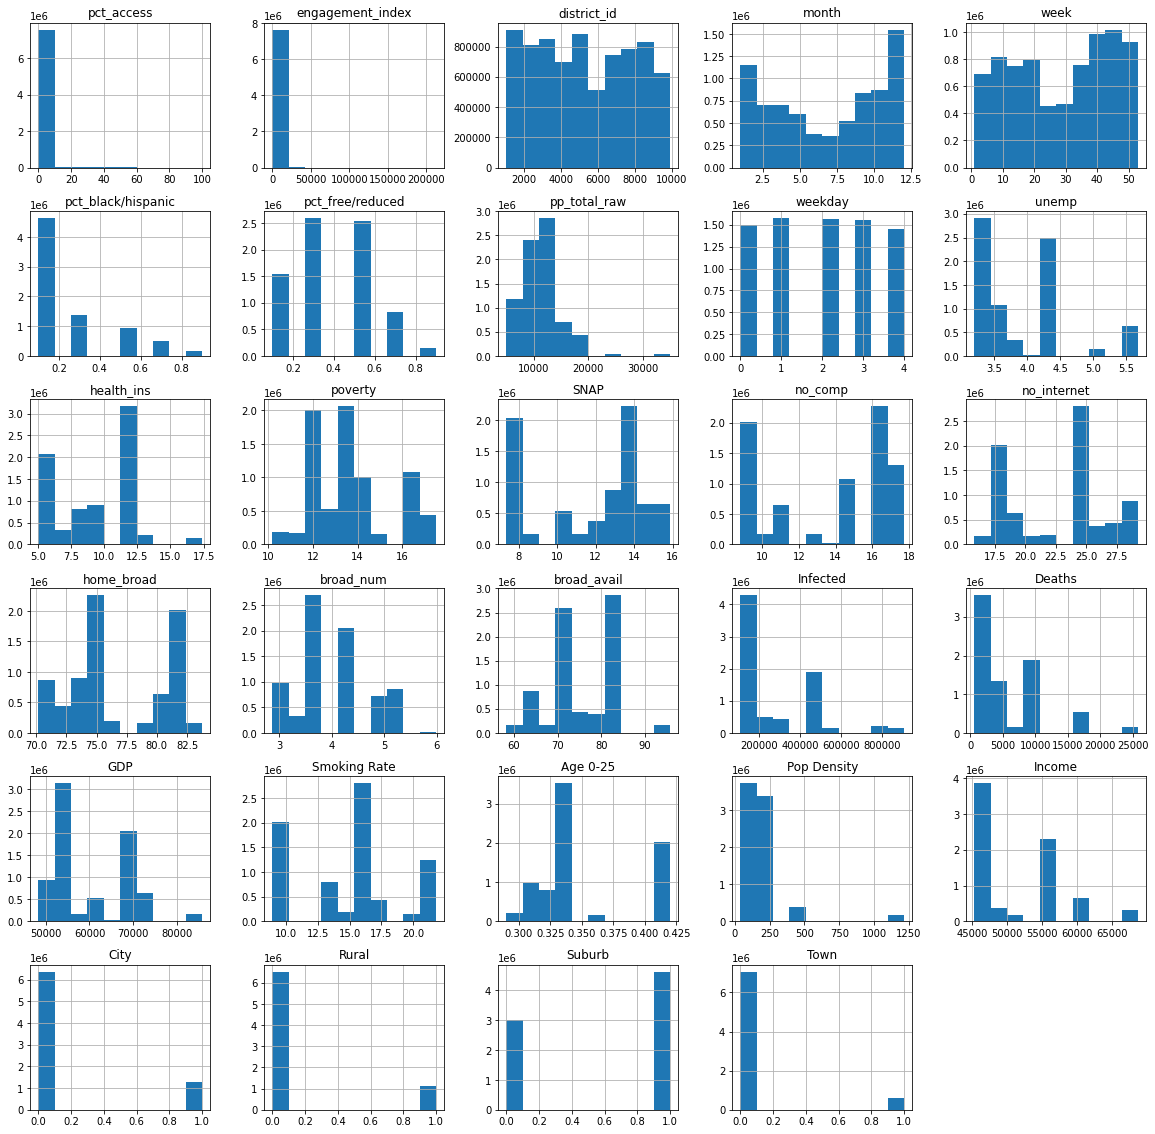

In [ ]:
all_data.hist(figsize=(20,20))

In [ ]:
mean_data = all_data.groupby(['district_id','month']).mean()


In [ ]:
mean_data = mean_data.reset_index()


In [ ]:
del mean_data['district_id']
del mean_data['month']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1479b17350>,
      dtype=object)

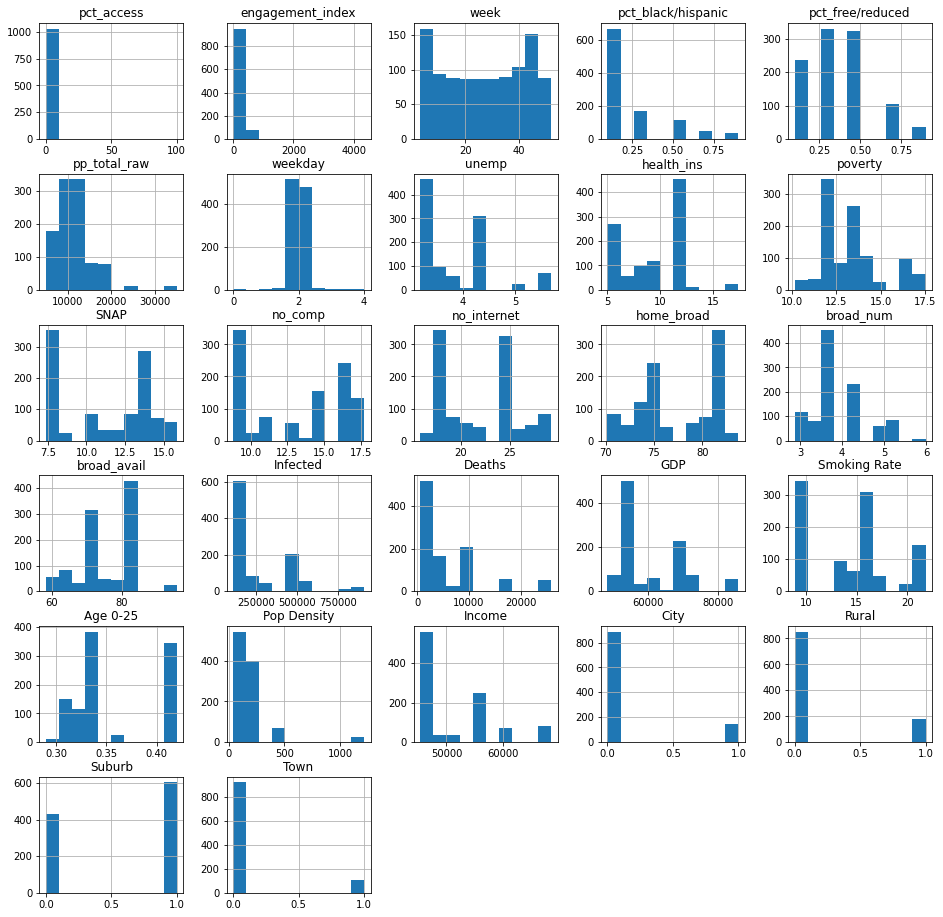

In [ ]:
mean_data.hist(figsize=(16, 16))


In [ ]:
del mean_data['week']
del mean_data['weekday']

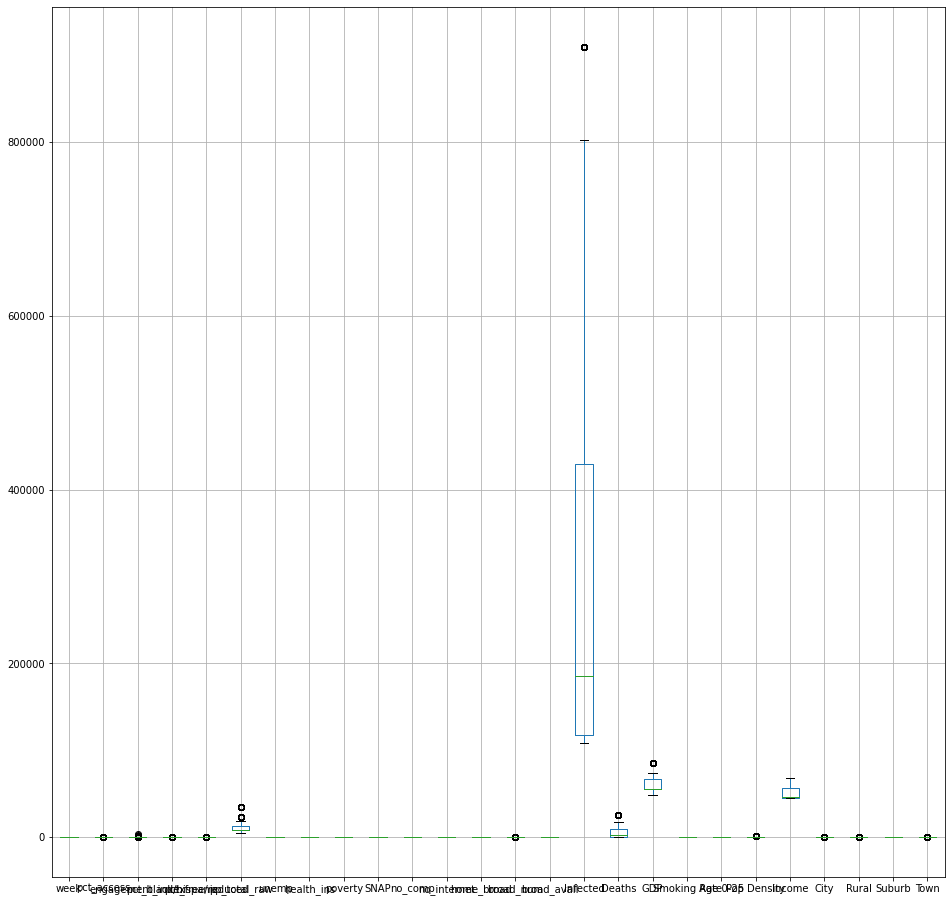

In [ ]:
mean_data.boxplot(figsize=(16, 16))

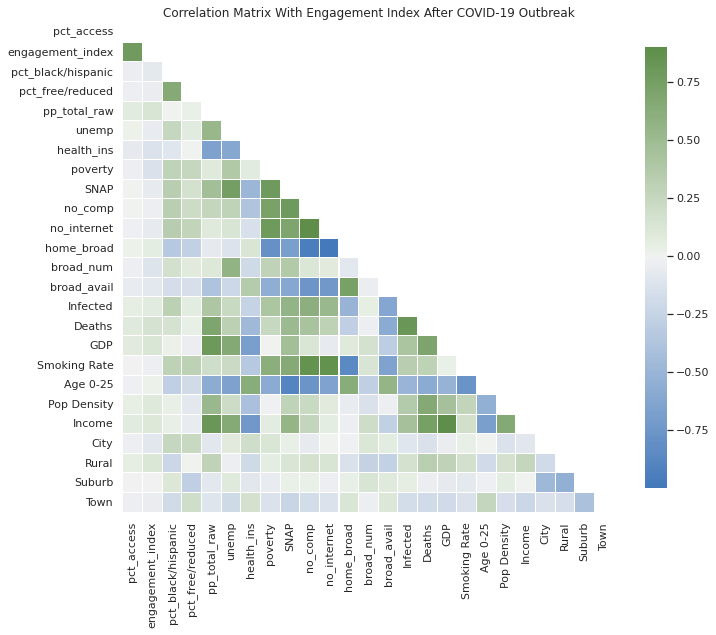

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
             #    columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = mean_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250,120 ,as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=False, linewidths=.1, cbar_kws={"shrink": .9})
ax.set_title('Correlation Matrix With Engagement Index After COVID-19 Outbreak')
f.show()
f.savefig('cor_mat.jpeg',dpi=300,bbox_inches='tight',pad_inches=0.5)

In [ ]:
os.getcwd()

'/content/Data_Mining_dataset/engagement_data'

In [ ]:
mean_data.var().round(2)  

pct_access            4.960000e+00
engagement_index      3.055422e+04
pct_black/hispanic    5.000000e-02
pct_free/reduced      4.000000e-02
pp_total_raw          1.800129e+07
unemp                 4.800000e-01
health_ins            8.850000e+00
poverty               3.040000e+00
SNAP                  9.110000e+00
no_comp               1.216000e+01
no_internet           1.691000e+01
home_broad            1.625000e+01
broad_num             3.600000e-01
broad_avail           6.945000e+01
Infected              3.157736e+10
Deaths                4.230949e+07
GDP                   7.570072e+07
Smoking Rate          1.869000e+01
Age 0-25              0.000000e+00
Pop Density           3.697382e+04
Income                5.206818e+07
City                  1.200000e-01
Rural                 1.400000e-01
Suburb                2.400000e-01
Town                  9.000000e-02
dtype: float64

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

In [ ]:
pt = PowerTransformer()
scaler = MinMaxScaler()
scaler_inp =["pp_total_raw",'Infected','Deaths','GDP','Income']
mean_data_1 = mean_data.copy()
mean_data_2=mean_data.copy()

mean_data[["pct_access", "engagement_index","pct_black/hispanic","pct_free/reduced",'unemp','health_ins','poverty','SNAP','no_comp','no_internet','home_broad','broad_num','broad_avail','Smoking Rate','Age 0-25','Pop Density']] = pd.DataFrame(
    pt.fit_transform(mean_data_1[["pct_access", "engagement_index","pct_black/hispanic","pct_free/reduced",'unemp','health_ins','poverty','SNAP','no_comp','no_internet','home_broad','broad_num','broad_avail','Smoking Rate','Age 0-25','Pop Density']]),
     columns=["pct_access", "engagement_index","pct_black/hispanic","pct_free/reduced",'unemp','health_ins','poverty','SNAP','no_comp','no_internet','home_broad','broad_num','broad_avail','Smoking Rate','Age 0-25','Pop Density']
)

mean_data[scaler_inp]=pd.DataFrame(
    scaler.fit_transform(mean_data_2[scaler_inp]),
     columns=[scaler_inp])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff870152110>,
      dtype=object)

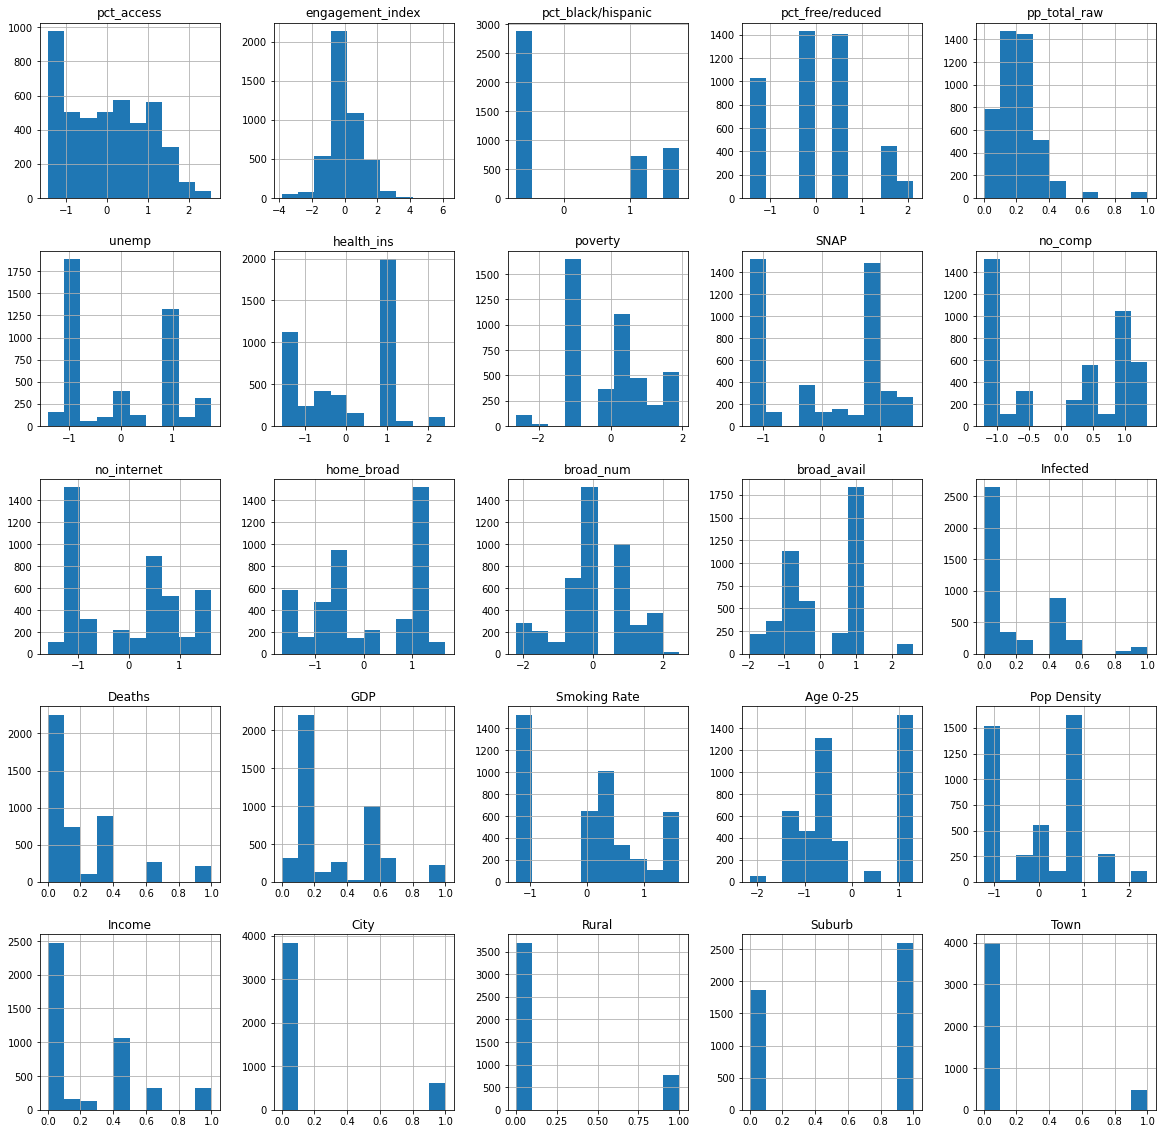

In [ ]:
mean_data.hist(figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff871a2d8d0>,
      dtype=object)

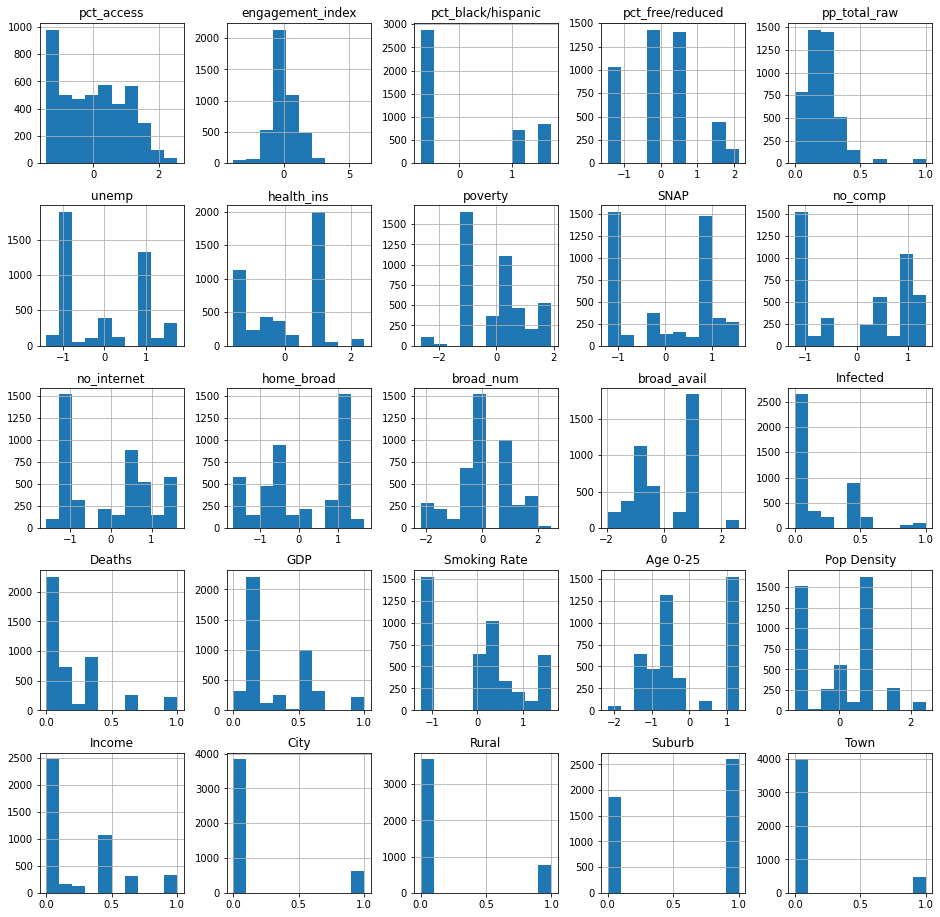

In [ ]:
mean_data.hist(figsize=(16, 16))
#del mean_data['pp_total_raw']

In [ ]:
mean_data.corr()

,pct_access,engagement_index,pct_black/hispanic,pct_free/reduced,pp_total_raw,unemp,health_ins,poverty,SNAP,no_comp,no_internet,home_broad,broad_num,broad_avail,Infected,Deaths,GDP,Smoking Rate,Age 0-25,Pop Density,Income,City,Rural,Suburb,Town
pct_access,1.000000,0.800673,-0.167935,-0.146408,0.137492,-0.053793,-0.174747,-0.190258,-0.117064,-0.051038,-0.087873,0.094805,-0.055966,-0.033447,0.023913,0.106507,0.112581,-0.043605,0.063104,0.051146,0.095731,-0.103773,0.136497,0.003220,-0.056749
engagement_index,0.800673,1.000000,-0.140221,-0.123484,0.143663,-0.040015,-0.152186,-0.108804,-0.057302,0.022702,-0.008983,0.015710,-0.103660,-0.100467,0.105273,0.165120,0.105737,0.017054,0.036442,0.107214,0.093004,-0.103000,0.182195,-0.047482,-0.032338
pct_black/hispanic,-0.167935,-0.140221,1.000000,0.571747,0.016324,0.333696,-0.080660,0.358226,0.376025,0.295769,0.314578,-0.307675,0.210434,-0.118420,0.292017,0.118028,0.019126,0.261711,-0.270060,0.228317,0.024960,0.311004,-0.263810,0.099949,-0.187023
pct_free/reduced,-0.146408,-0.123484,0.571747,1.000000,0.026775,0.005371,0.043139,0.289067,0.159867,0.186681,0.271613,-0.273382,0.051754,-0.160967,0.052874,0.030474,-0.049032,0.282127,-0.137363,0.104587,-0.071355,0.230995,0.007261,-0.292730,0.202169
pp_total_raw,0.137492,0.143663,0.016324,0.026775,1.000000,0.598714,-0.665702,0.128279,0.476340,0.259753,0.121378,-0.085309,0.072145,-0.366494,0.396436,0.695301,0.807873,0.240443,-0.593021,0.621784,0.821156,-0.093782,0.277415,-0.083244,-0.103007
unemp,-0.053793,-0.040015,0.333696,0.005371,0.598714,1.000000,-0.695523,0.456219,0.812979,0.439946,0.293260,-0.259475,0.465037,-0.375588,0.394289,0.469546,0.665912,0.351997,-0.730463,0.584767,0.680268,-0.003132,-0.004608,0.140087,-0.217076
health_ins,-0.174747,-0.152186,-0.080660,0.043139,-0.665702,-0.695523,1.000000,-0.034059,-0.504335,-0.403160,-0.223453,0.183277,-0.202108,0.381043,-0.302842,-0.494055,-0.695734,-0.381567,0.617470,-0.657560,-0.745249,0.196586,-0.197713,-0.095416,0.176383
poverty,-0.190258,-0.108804,0.358226,0.289067,0.128279,0.456219,-0.034059,1.000000,0.819986,0.738149,0.792005,-0.790955,0.266070,-0.629285,0.434607,0.267818,0.088288,0.638194,-0.553922,0.400706,0.113445,0.117014,0.106240,-0.083898,-0.128719
SNAP,-0.117064,-0.057302,0.376025,0.159867,0.476340,0.812979,-0.504335,0.819986,1.000000,0.792799,0.718744,-0.693999,0.288839,-0.616022,0.563357,0.513668,0.475155,0.704223,-0.880021,0.740340,0.556444,0.032524,0.124637,0.029539,-0.239039
no_comp,-0.051038,0.022702,0.295769,0.186681,0.259753,0.439946,-0.403160,0.738149,0.792799,1.000000,0.970543,-0.960605,0.068526,-0.769526,0.603109,0.434291,0.132750,0.882813,-0.687341,0.700535,0.269383,-0.062039,0.162479,0.025285,-0.171894


In [ ]:
del mean_data['pct_access']

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [ ]:
df_train, df_test = train_test_split(mean_data, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)


In [ ]:
y_train = df_train.pop('engagement_index')
X_train = df_train

y_test = df_test.pop('engagement_index')
X_test = df_test

In [ ]:
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores      

array([0.04072014, 0.07276135, 0.17783739, 0.08405873, 0.23146172])

In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=folds)
scores  

array([0.08229986, 0.14078348, 0.24968604, 0.12553342, 0.12144683])

In [ ]:
len(X_train.columns)

23

In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 24))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)       

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22,
                                                   23]}],
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023428,0.001860,0.002260,0.000069,1,{'n_features_to_select': 1},-0.001761,-0.009453,0.015662,0.003797,0.013832,0.004415,0.009445,23,0.023694,0.022127,0.020014,0.007058,0.017888,0.018157,0.005885
1,0.022355,0.000645,0.002216,0.000018,2,{'n_features_to_select': 2},-0.007197,-0.021089,0.016140,0.037633,0.018673,0.008832,0.020649,21,0.025528,0.029820,0.020019,0.092693,0.021560,0.037924,0.027595
2,0.021170,0.000164,0.002223,0.000040,3,{'n_features_to_select': 3},-0.000860,-0.047224,0.032695,0.053001,0.008461,0.009215,0.033929,20,0.027865,0.043131,0.050805,0.094560,0.030296,0.049331,0.024122
3,0.020218,0.000282,0.002187,0.000032,4,{'n_features_to_select': 4},-0.016646,-0.048362,0.030587,0.057555,0.008737,0.006374,0.036708,22,0.030670,0.043455,0.051177,0.094787,0.030345,0.050087,0.023706
4,0.019613,0.000166,0.002334,0.000162,5,{'n_features_to_select': 5},-0.023225,-0.046692,0.052210,0.055958,0.013569,0.010364,0.040555,19,0.048342,0.052228,0.061120,0.094855,0.036238,0.058557,0.019832
5,0.019519,0.001403,0.002199,0.000079,6,{'n_features_to_select': 6},0.030398,0.038412,0.070734,0.055626,0.035796,0.046193,0.014895,18,0.105594,0.099471,0.080961,0.094876,0.100820,0.096344,0.008416
6,0.019019,0.000390,0.002299,0.000126,7,{'n_features_to_select': 7},0.015392,0.062314,0.104871,0.054862,0.034936,0.054475,0.030036,17,0.140924,0.125405,0.084650,0.094900,0.134075,0.115991,0.022201
7,0.017941,0.000289,0.002281,0.000058,8,{'n_features_to_select': 8},0.009346,0.067051,0.185699,0.144775,0.042200,0.089814,0.065536,15,0.146486,0.128936,0.095314,0.128035,0.135163,0.126787,0.017058
8,0.016650,0.000119,0.002194,0.000045,9,{'n_features_to_select': 9},0.007168,0.060966,0.181870,0.138774,0.041932,0.086142,0.064435,16,0.147065,0.130190,0.095378,0.128938,0.135744,0.127463,0.017274
9,0.015930,0.000068,0.002235,0.000046,10,{'n_features_to_select': 10},0.026031,0.093896,0.204724,0.115622,0.055866,0.099228,0.061098,14,0.171549,0.143970,0.113093,0.141226,0.154363,0.144840,0.019109


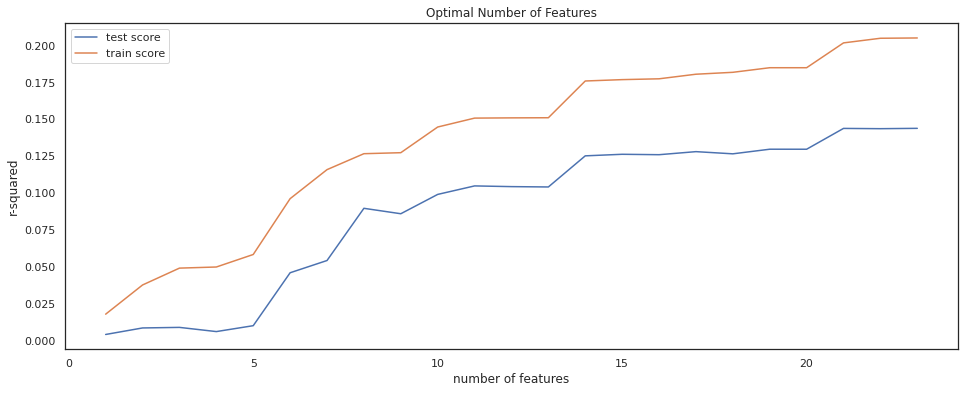

In [ ]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
n_features_optimal = 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.15345603567465949


In [ ]:
df_train, df_test = train_test_split(mean_data, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 100)

In [ ]:
y_train = df_train.pop('engagement_index')
X_train = df_train

y_test = df_test.pop('engagement_index')
X_test = df_test

In [ ]:
n_features_optimal =11

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.11746214377473652


In [ ]:
from sklearn.svm import SVR 
regressor = SVR(kernel = 'rbf') 
regressor.fit(X_train, y_train)

SVR()

In [ ]:
param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')},

modelsvr = SVR()

model_cv = GridSearchCV(modelsvr,param,cv=5)

model_cv.fit(X_train,y_train)

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_coef0,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030705,0.000789,0.004436,0.000184,1,0.01,3,auto,linear,"{'C': 1, 'coef0': 0.01, 'degree': 3, 'gamma': ...",0.059586,-0.016520,0.094301,0.060537,0.141338,0.067848,0.051653,67
1,0.018350,0.000418,0.004607,0.000165,1,0.01,3,auto,poly,"{'C': 1, 'coef0': 0.01, 'degree': 3, 'gamma': ...",0.155113,-0.043380,0.116556,0.115562,0.136019,0.095974,0.071173,56
2,0.025683,0.000411,0.007912,0.000176,1,0.01,3,auto,rbf,"{'C': 1, 'coef0': 0.01, 'degree': 3, 'gamma': ...",0.127351,-0.071885,0.127672,0.109730,0.165224,0.091618,0.083733,57
3,0.037970,0.001806,0.007965,0.000068,1,0.01,3,auto,sigmoid,"{'C': 1, 'coef0': 0.01, 'degree': 3, 'gamma': ...",-1.682601,-0.725695,-2.155140,-1.439699,-2.094711,-1.619569,0.519217,115
4,0.030569,0.001024,0.004662,0.000292,1,0.01,3,scale,linear,"{'C': 1, 'coef0': 0.01, 'degree': 3, 'gamma': ...",0.059586,-0.016520,0.094301,0.060537,0.141338,0.067848,0.051653,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,0.037188,0.000914,0.008927,0.000111,10,0.5,8,auto,sigmoid,"{'C': 10, 'coef0': 0.5, 'degree': 8, 'gamma': ...",-3328.627463,-1943.050651,-2942.418806,-3083.022333,-1924.075344,-2644.238919,593.317852,134
140,0.080565,0.006032,0.004639,0.000049,10,0.5,8,scale,linear,"{'C': 10, 'coef0': 0.5, 'degree': 8, 'gamma': ...",-0.053928,-0.005555,0.095621,0.060165,0.146143,0.048489,0.071139,79
141,0.026319,0.000894,0.004514,0.000091,10,0.5,8,scale,poly,"{'C': 10, 'coef0': 0.5, 'degree': 8, 'gamma': ...",0.261392,-0.061326,0.161037,0.271874,0.441304,0.214856,0.164844,1
142,0.028007,0.000445,0.007842,0.000128,10,0.5,8,scale,rbf,"{'C': 10, 'coef0': 0.5, 'degree': 8, 'gamma': ...",0.113821,-0.117009,0.133562,0.187632,0.263304,0.116262,0.127621,19


In [ ]:
model_cv.best_params_

{'C': 10, 'coef0': 0.5, 'degree': 8, 'gamma': 'scale', 'kernel': 'poly'}

In [ ]:
y_pred = model_cv.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)
import sklearn
r2 = sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False)
print(r2)

# plt.scatter(X_test, y_test, color = 'red')
# plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
# plt.title('Truth or Bluff (SVR)')
# plt.xlabel('Position level')
# plt.ylabel('Salary')
# plt.show()

0.34443036441892294
0.7874283319871253


In [ ]:
c_range = np.logspace(-0, 4, 8)
gamma_range = np.logspace(-4, 0, 8)
tuned_parameters = [{'kernel': ['rbf'],'C': c_range,'gamma':gamma_range},
                    {'kernel': ['linear'], 'C': c_range,'gamma':gamma_range}]

svr = svm.SVR()
clf = GridSearchCV(svr,param_grid=tuned_parameters,verbose=20,n_jobs=-4,cv=4,
                   scoring='explained_variance')
clf.fit(X_train, y_train)

print('Best score for data:', clf.best_score_)
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

# scores for rbf kernel
n = len(gamma_range)*len(c_range)
scores_rbf = clf.cv_results_['mean_test_score'][:n].reshape(len(gamma_range),
                                                            len(c_range))

# scores for rbf kernel
scores_linear = clf.cv_results_['mean_test_score'][n:].reshape(len(gamma_range),
                                                               len(c_range))


plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores_rbf, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=-.2, midpoint=0.5))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)),
           [np.format_float_scientific(i,1) for i in gamma_range],rotation=45)
plt.yticks(np.arange(len(c_range)), 
           [np.format_float_scientific(i,) for i in c_range])
plt.title('Validation accuracy')
plt.show()

In [ ]:
class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

In [ ]:
from matplotlib.colors import Normalize
param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')},
c_range = np.logspace(-0, 4, 8)
gamma_range = np.logspace(-4, 0, 8)
tuned_parameters = [{'kernel': ['rbf'],'C': c_range,'gamma':gamma_range ,'degree' : [3,8],'coef0' : [0.01,10,0.5]},
                    {'kernel': ['poly'], 'C': c_range,'gamma':gamma_range,'degree' : [3,8],'coef0' : [0.01,10,0.5]}]

svr = SVR()
clf = GridSearchCV(svr,param_grid=tuned_parameters,verbose=20,n_jobs=-4,cv=4,
                   scoring='explained_variance')
clf.fit(X_train, y_train)

print('Best score for data:', clf.best_score_)
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

# scores for rbf kernel
n = len(gamma_range)*len(c_range)
scores_rbf = clf.cv_results_['mean_test_score'][:n].reshape(len(gamma_range),
                                                            len(c_range))

# scores for rbf kernel
scores_linear = clf.cv_results_['mean_test_score'][n:].reshape(len(gamma_range),
                                                               len(c_range))




Fitting 4 folds for each of 768 candidates, totalling 3072 fits


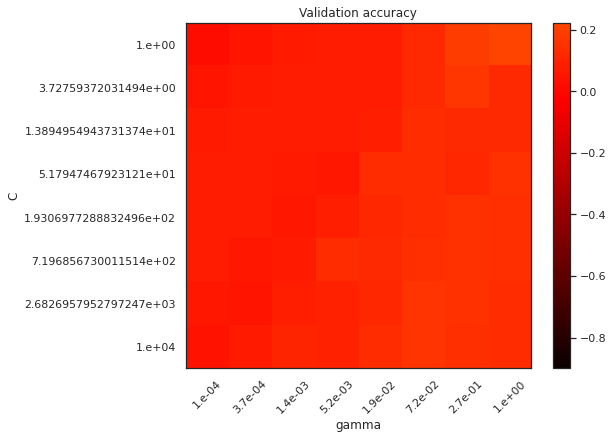

In [ ]:
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores_rbf, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=-.9, midpoint=0.3))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)),
           [np.format_float_scientific(i,1) for i in gamma_range],rotation=45)
plt.yticks(np.arange(len(c_range)), 
           [np.format_float_scientific(i,) for i in c_range])
plt.title('Validation accuracy')
plt.show()